### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Swimming']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 0       Swimming
1       Swimming
2       Swimming
3       Swimming
4       Swimming
          ...   
3854    Swimming
3855    Swimming
3856    Swimming
3857    Swimming
3858    Swimming
Name: Sport, Length: 3859, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 0           NA
1           NA
2           NA
3           NA
4           NA
         ...  
3854    Silver
3855        NA
3856        NA
3857        NA
3858        NA
Name: Medal, Length: 3859, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 3858
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3859 non-null   int64  
 1   Unnamed: 0_x    3859 non-null   int64  
 2   ID              3859 non-null   int64  
 3   Name            3859 non-null   object 
 4   Sex             3859 non-null   object 
 5   Age             3859 non-null   float64
 6   Height          3859 non-null   float64
 7   Weight          3859 non-null   float64
 8   NOC             3859 non-null   object 
 9   Games           3859 non-null   object 
 10  Year            3859 non-null   int64  
 11  Season          3859 non-null   object 
 12  City            3859 non-null   object 
 13  Sport           3859 non-null   object 
 14  Event           3859 non-null   object 
 15  Medal           3859 non-null   object 
 16  Team            3859 non-null   object 
 17  Unnamed: 0_y    3859 non-null   f

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2894, 1) (2894, 6)
Test Set  : (965, 1) (965, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
538,16.0,50.000000,161.000000,3.470000e+11,22570224.0,15374.238200,NA
266,27.0,74.000000,185.000000,1.230000e+13,292805298.0,42007.436628,Silver
902,32.0,64.128866,173.953608,5.630000e+08,57030.0,9871.997194,NA
396,25.0,59.000000,170.000000,1.860000e+12,60600590.0,30692.770483,Silver
2056,23.0,65.000000,170.000000,5.140000e+11,9219637.0,55750.568054,NA
...,...,...,...,...,...,...,...
732,23.0,80.000000,190.000000,3.620000e+11,40382389.0,8964.303722,NA
1444,23.0,70.000000,185.000000,1.280000e+11,9920362.0,12902.754960,NA
1585,14.0,54.000000,165.000000,1.260000e+11,9817958.0,12833.625892,NA
1207,19.0,71.000000,187.000000,5.140000e+11,9903122.0,51902.824180,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        3378
Gold       170
Silver     161
Bronze     150
Name: Medal, dtype: int64


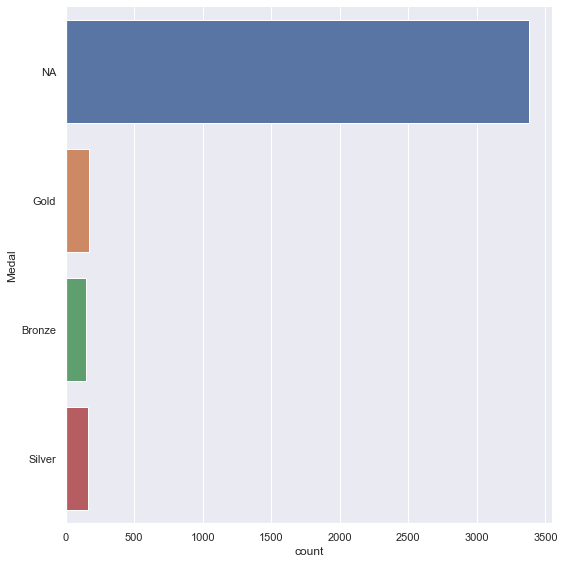

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(2894, 6) (2894, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(10088, 6) (10088, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,16.000000,50.000000,161.000000,3.470000e+11,2.257022e+07,15374.238200,NA
1,27.000000,74.000000,185.000000,1.230000e+13,2.928053e+08,42007.436628,Silver
2,32.000000,64.128866,173.953608,5.630000e+08,5.703000e+04,9871.997194,NA
3,25.000000,59.000000,170.000000,1.860000e+12,6.060059e+07,30692.770483,Silver
4,23.000000,65.000000,170.000000,5.140000e+11,9.219637e+06,55750.568054,NA
...,...,...,...,...,...,...,...
10083,21.514482,63.427590,176.086892,1.200000e+12,2.412716e+07,49736.481614,Silver
10084,21.903301,70.397800,177.048350,1.540000e+12,2.272825e+07,67757.074521,Silver
10085,21.702612,71.297388,180.421567,8.290000e+11,1.675496e+07,49477.880045,Silver
10086,27.969375,72.788281,183.061250,1.230000e+13,2.928053e+08,42007.436628,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
1939,25.0,53.0,169.0,2.410000e+11,1.095514e+07,21998.804032
2190,22.0,68.0,177.0,2.120000e+12,6.270490e+07,33809.161667
685,24.0,66.0,165.0,1.800000e+12,2.076529e+08,8668.312860
2185,33.0,62.0,178.0,1.700000e+12,1.929790e+08,8809.247351
893,22.0,66.0,170.0,5.140000e+11,9.219637e+06,55750.568054
...,...,...,...,...,...,...
3808,21.0,63.0,176.0,8.560000e+12,1.350695e+09,6337.478113
10,23.0,70.0,179.0,2.660000e+12,6.370030e+07,41758.045096
1976,21.0,69.0,180.0,2.920000e+12,6.437499e+07,45359.230347
1458,20.0,60.0,175.0,2.510000e+11,5.404523e+06,46442.581519


Number of Medal Types : 4
Bronze    2522
Gold      2522
NA        2522
Silver    2522
Name: Medal, dtype: int64


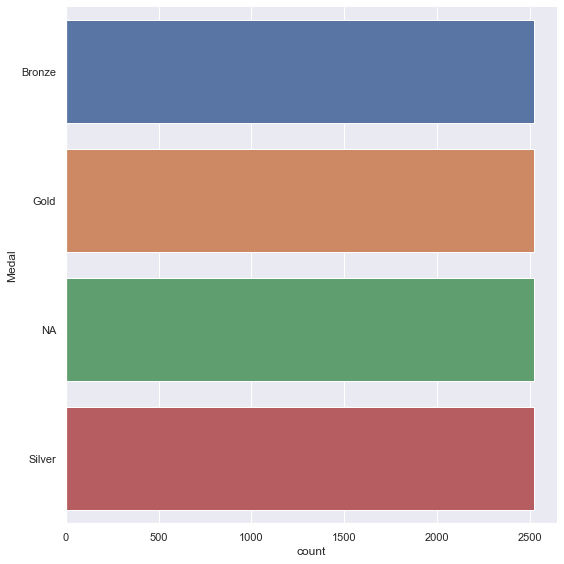

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (7566, 1) (7566, 6)
Test Set  : (2522, 1) (2522, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.908406026962728

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8509119746233148



<AxesSubplot:>

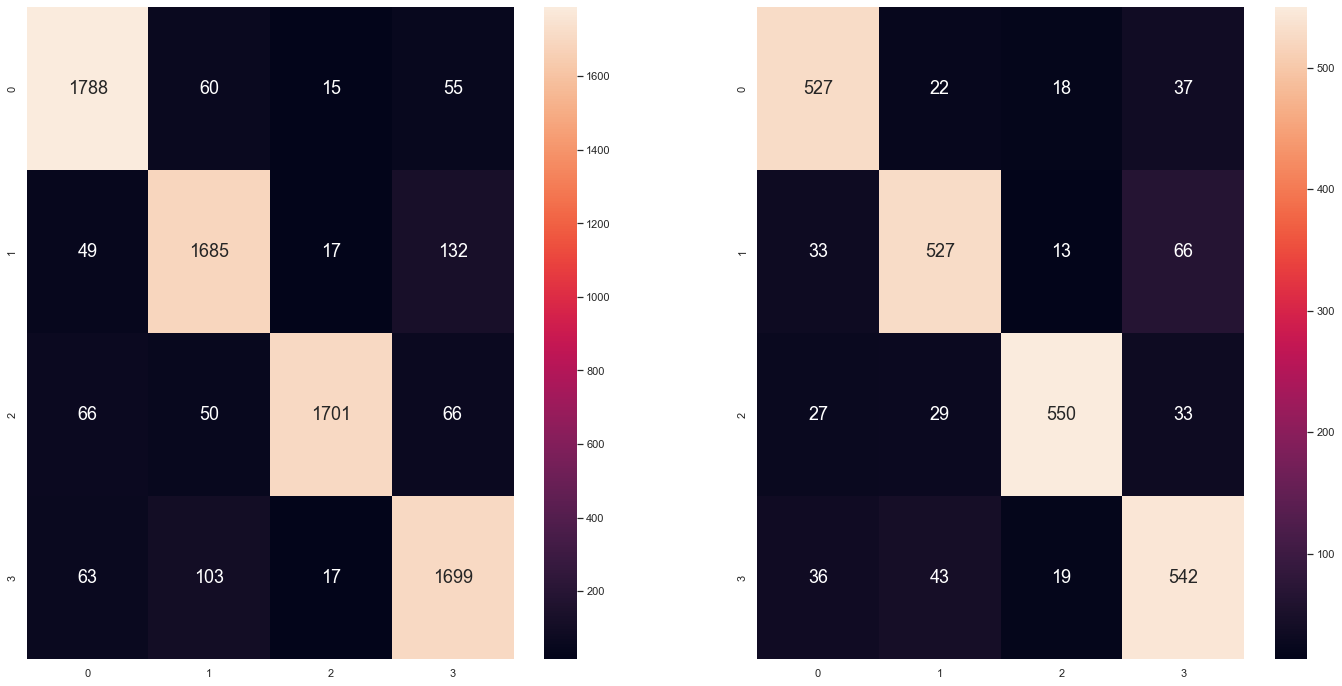

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

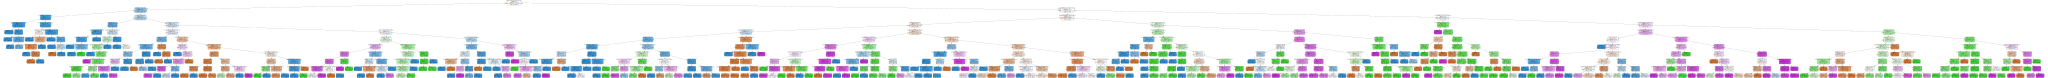

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [27]:
graph.render("Tree_female_swim")

'Tree_female_swim.pdf'

### Predictions

In [24]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.8414507772020725


<AxesSubplot:>

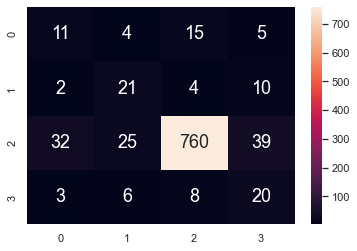

In [26]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})